In [151]:
import nltk
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt')
nltk.download('stopwords')

corpus = [
    "I love machine learning",
    "I Love nLP",
    "nlp is better then Machine learning"
]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prasa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prasa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [152]:
print(corpus)


['I love machine learning', 'I Love nLP', 'nlp is better then Machine learning']


In [153]:
dataset=[i.lower() for i in corpus]
dataset

['i love machine learning',
 'i love nlp',
 'nlp is better then machine learning']

In [154]:
word2count = {}
for data in dataset:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count:
            word2count[word] = 1
        else:
            word2count[word] += 1
word2count

{'i': 2,
 'love': 2,
 'machine': 2,
 'learning': 2,
 'nlp': 2,
 'is': 1,
 'better': 1,
 'then': 1}

In [155]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [156]:
# Filter out stopwords
filtered_word2count = {word: count for word, count in word2count.items() if word.lower() not in stop_words}

filtered_word2count

{'love': 2, 'machine': 2, 'learning': 2, 'nlp': 2, 'better': 1}

In [157]:
# Convert to DataFrame
word_freq_df = pd.DataFrame(list(filtered_word2count.items()), columns=['Word', 'Frequency'])
word_freq_df

,Word,Frequency
0,love,2
1,machine,2
2,learning,2
3,nlp,2
4,better,1


In [158]:
freq_words = word_freq_df['Word'].tolist()
freq_words

['love', 'machine', 'learning', 'nlp', 'better']

In [159]:
x= []
for data in corpus:
    vector = []
    tokens = nltk.word_tokenize(data.lower()) 
    for word in freq_words:
        if word in tokens:
            vector.append(1)
        else:
            vector.append(0)
    x.append(vector)
x

[[1, 1, 1, 0, 0], [1, 0, 0, 1, 0], [0, 1, 1, 1, 1]]

In [160]:
corpus

['I love machine learning',
 'I Love nLP',
 'nlp is better then Machine learning']

In [161]:
x=np.asarray(x)
x

array([[1, 1, 1, 0, 0],
       [1, 0, 0, 1, 0],
       [0, 1, 1, 1, 1]])

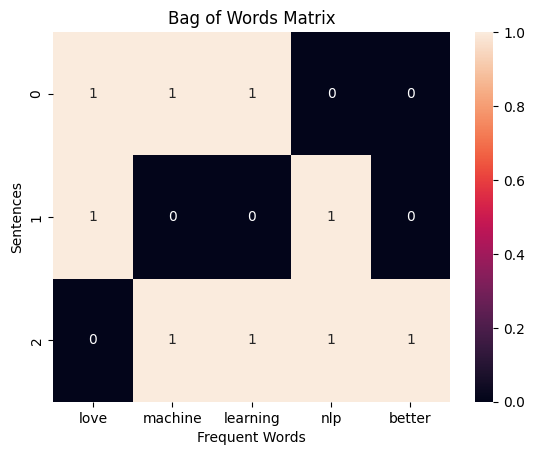

In [162]:
sns.heatmap(
    x,
    annot=True,
    xticklabels=freq_words,
)

plt.title('Bag of Words Matrix')
plt.xlabel('Frequent Words')
plt.ylabel('Sentences')
plt.show()


-----------------------------------------------

In [163]:
print(corpus)
corpus=[i.lower() for i in corpus]
print(corpus)

['I love machine learning', 'I Love nLP', 'nlp is better then Machine learning']
['i love machine learning', 'i love nlp', 'nlp is better then machine learning']


In [164]:
#with our removing the stopwords
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()   
x=cv.fit_transform(corpus).toarray()
print(x)
words = cv.get_feature_names_out()
print(words)

[[0 0 1 1 1 0 0]
 [0 0 0 1 0 1 0]
 [1 1 1 0 1 1 1]]
['better' 'is' 'learning' 'love' 'machine' 'nlp' 'then']


<Axes: >

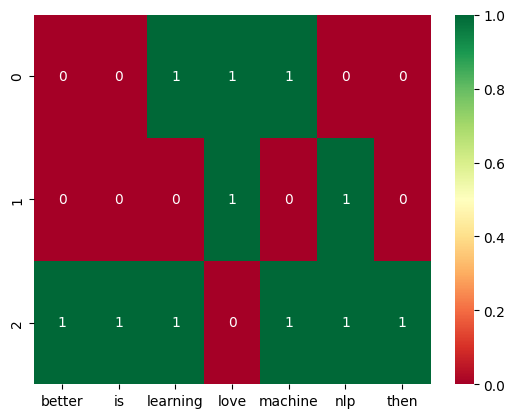

In [165]:
sns.heatmap(x,annot=True,xticklabels=words,cmap="RdYlGn")

In [166]:
#after removing the stop words
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(stop_words='english')   
x=cv.fit_transform(corpus).toarray()
print(x)
words1 = cv.get_feature_names_out()
print(words1)

[[0 1 1 1 0]
 [0 0 1 0 1]
 [1 1 0 1 1]]
['better' 'learning' 'love' 'machine' 'nlp']


<Axes: >

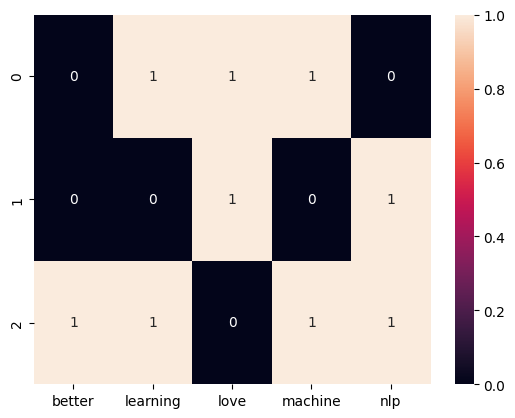

In [167]:
sns.heatmap(x,annot=True,xticklabels=words1)